# ИУ5-62Б Федосеева Е.Ю.

## Рубежный контроль №2 (вариант 18)

### Задача
Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

### Набор данных
https://www.kaggle.com/rhuebner/human-resources-data-set

### Методы
* метод опорных векторов
* случайный лес

## Решение

In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
data = pd.read_csv("HRDataset_v14.csv")
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [4]:
print('Количество пропущенных значений')
data.isnull().sum()

Количество пропущенных значений


Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

Удалим строки с пропущенными значениями, которые не влияют на целевой признак.

In [55]:
data = data.dropna(subset=['DateofTermination'], axis=0)
data = data.dropna(subset=['Termd'], axis=0)
del data['ManagerName']
del data['RecruitmentSource']
del data['PerformanceScore']

In [59]:
not_number_cols = data.select_dtypes(include=['object'])
number_cols = data.select_dtypes(exclude=['object'])

le = preprocessing.LabelEncoder()

for col_name in not_number_cols:
    data[col_name] = le.fit_transform(data[col_name])

In [60]:
data

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,...,TermReason,EmploymentStatus,Department,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,10084,1,1,1,5,3,3,0,104437,1,...,4,1,1,4.0,4.96,3,6,33,0,17
2,10196,1,1,0,5,5,3,0,64955,1,...,6,1,2,20.0,3.02,3,0,76,0,3
4,10069,0,2,0,5,5,3,0,50825,1,...,15,1,2,39.0,5.00,4,0,21,0,2
10,10252,1,1,0,5,5,3,1,54670,1,...,0,1,2,14.0,4.20,4,0,13,0,12
11,10242,1,1,1,5,5,3,1,47211,1,...,16,1,2,20.0,4.20,3,0,82,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,10048,1,1,1,5,5,3,0,55140,1,...,16,1,2,11.0,5.00,3,0,27,0,7
302,10204,0,2,0,5,5,3,0,58062,1,...,0,1,2,19.0,3.60,5,0,39,0,9
303,10264,0,0,0,5,5,3,1,59728,1,...,13,1,2,19.0,4.30,4,0,84,0,16
304,10033,0,0,1,5,5,4,0,70507,1,...,14,1,2,12.0,5.00,3,0,8,0,7


### Выбор метрик и подготовка данных

Так как выполняется задача небинарной классификации и в тестовой выборке возможен дисбаланс классов, были выбраны следующие метрики:

* precision;
* recall;
* f1-score.

Всем метрикам был задан уровень детализации average='weighted'.

In [61]:
def print_metrics(y_test, y_pred):
    rep = classification_report(y_test, y_pred, output_dict=True)
    print("weighted precision:", rep['weighted avg']['precision'])
    print("weighted recall:", rep['weighted avg']['recall'])
    print("weighted f1-score:", rep['weighted avg']['f1-score'])
    plt.figure(figsize=(4, 3))
    plt.title('Матрица ошибок')
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues");

In [86]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['GenderID'], axis=1), data['GenderID'], test_size=0.5, random_state=17)

### SVC. Базовая модель.

In [87]:
scaler = StandardScaler().fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_train_scaled.describe()

,EmpID,MarriedID,MaritalStatusID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,...,TermReason,EmploymentStatus,Department,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
count,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.0,5.200000e+01,...,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01
mean,-1.571393e-15,-1.708035e-16,-8.340017e-17,4.366166e-16,-2.241796e-16,-3.223917e-16,-4.056584e-17,1.174274e-16,0.0,-2.530027e-16,...,-1.281027e-17,3.736327e-17,1.574595e-16,1.184950e-16,8.956511e-16,-5.871372e-17,1.708035e-17,8.113168e-17,6.191628e-17,4.056584e-17
std,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,0.0,1.009756e+00,...,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00,1.009756e+00
min,-1.784753e+00,-9.258201e-01,-1.046217e+00,-6.258604e+00,-4.545267e+00,-3.637426e+00,-4.879500e-01,-1.218021e+00,0.0,-3.627558e+00,...,-1.267080e+00,-2.768875e+00,-3.341121e+00,-1.377245e+00,-2.695685e+00,-2.325608e+00,-4.125653e-01,-1.628640e+00,-3.547710e-01,-1.726376e+00
25%,-8.339522e-01,-9.258201e-01,-1.046217e+00,2.830525e-01,3.532591e-01,1.080424e-01,-4.879500e-01,-6.890840e-01,0.0,1.809471e-01,...,-1.139059e+00,3.611576e-01,6.551218e-02,-5.410015e-01,-6.600979e-01,-1.065903e+00,-4.125653e-01,-7.409512e-01,-3.547710e-01,-8.697774e-01
50%,-6.881080e-02,-9.258201e-01,4.184870e-02,2.830525e-01,3.532591e-01,1.080424e-01,-4.879500e-01,-1.730204e-01,0.0,1.809471e-01,...,1.313036e-02,3.611576e-01,6.551218e-02,-9.071672e-02,1.286922e-01,1.938006e-01,-4.125653e-01,-6.101951e-02,-3.547710e-01,7.248145e-02
75%,9.551285e-01,1.080123e+00,4.184870e-02,2.830525e-01,3.532591e-01,1.080424e-01,-4.879500e-01,2.980155e-01,0.0,4.049768e-01,...,9.519511e-01,3.611576e-01,6.551218e-02,3.595681e-01,8.475090e-01,1.938006e-01,-4.125653e-01,7.794516e-01,-3.547710e-01,8.434205e-01
max,1.602123e+00,1.080123e+00,3.306047e+00,2.830525e-01,1.577891e+00,1.980777e+00,2.049390e+00,3.000796e+00,0.0,2.421244e+00,...,1.464035e+00,3.611576e-01,3.472145e+00,1.881960e+00,1.121041e+00,1.453505e+00,3.646185e+00,1.733245e+00,3.655684e+00,1.528700e+00


weighted precision: 0.9251748251748252
weighted recall: 0.9230769230769231
weighted f1-score: 0.9227309422211969


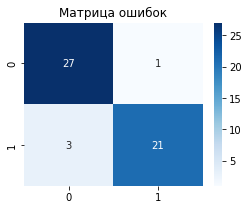

In [88]:
svm_model = SVC()
svm_model.fit(x_train_scaled, y_train)
y_pred_svm = svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

### Подбор гиперпараметров

In [89]:
params = {'C': np.concatenate([np.arange(0.1, 2, 0.03), np.arange(2, 20, 1)])}
grid_cv = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_macro')
grid_cv.fit(x_train_scaled, y_train)
print(grid_cv.best_params_)

{'C': 1.06}


Лучшая модель

weighted precision: 0.9427978318533042
weighted recall: 0.9423076923076923
weighted f1-score: 0.9422000172280126


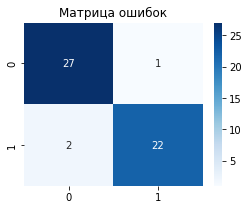

In [90]:
best_svm_model = grid_cv.best_estimator_
best_svm_model.fit(x_train_scaled, y_train)
y_pred_svm = best_svm_model.predict(x_test_scaled)
print_metrics(y_test, y_pred_svm)

### RandomForestClassifier

Базовая модель

weighted precision: 1.0
weighted recall: 1.0
weighted f1-score: 1.0


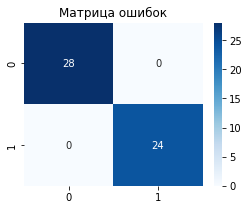

In [91]:
rfc_model = RandomForestClassifier()
rfc_model.fit(x_train, y_train)
y_pred_rfc = rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Подбор гиперпараметров

In [92]:
params = {'n_estimators': [5, 10, 50, 100], 'max_features': [2, 3, 4], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4, 5]}
grid_cv = GridSearchCV(estimator=rfc_model, param_grid=params, cv=10, n_jobs=-1, scoring='f1_weighted')
grid_cv.fit(x_train, y_train)
print(grid_cv.best_params_)

{'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 100}


Лучшая модель

weighted precision: 1.0
weighted recall: 1.0
weighted f1-score: 1.0


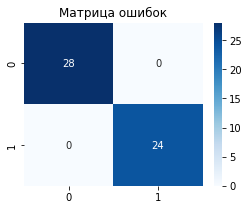

In [93]:
best_rfc_model = grid_cv.best_estimator_
best_rfc_model.fit(x_train, y_train)
y_pred_rfc = best_rfc_model.predict(x_test)
print_metrics(y_test, y_pred_rfc)

Сравнение результатов

SVC result

weighted precision: 0.9427978318533042
weighted recall: 0.9423076923076923
weighted f1-score: 0.9422000172280126


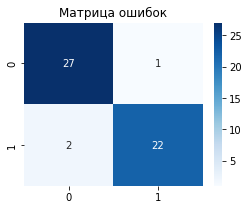

In [94]:
print("SVC result\n")
print_metrics(y_test, y_pred_svm)

RandomForestClassifier result

weighted precision: 1.0
weighted recall: 1.0
weighted f1-score: 1.0


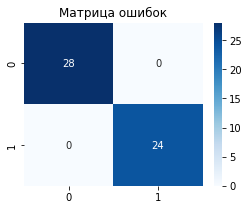

In [95]:
print("RandomForestClassifier result\n")
print_metrics(y_test, y_pred_rfc)

Вывод

Модели с подобранными гиперпараметрами оказались лучше базовых моделей. Обе конечные модели показали очень высокую точность прогноза, что объясняется спецификой используемого "игрушечного" датасета. Из матриц ошибок видим, что обе модели совершили по 2 неверных прогноза из 75, однако ошибки у них разные. Метрики показывают, что качества рассматриваемых моделей практически одинаковое: отличия начинаются лишь в 4 знаке после запятой.